In [1]:
import pandas as pd
import numpy as np
from functools import *
from google.colab import auth
auth.authenticate_user()

## **PULL DATA**

In [2]:
project_id = 'windy-ripsaw-309202'

In [3]:
sql_bkt_txn_data = '''
SELECT * FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.SUM_BKT_ID`
'''
df_bkt_txn = pd.io.gbq.read_gbq(sql_bkt_txn_data , project_id=project_id, verbose=False, dialect="standard")

In [4]:
# '''
# SELECT CUST_CODE, 
# SUM(SPEND) AS TOTAL_SALES, 
# COUNT(DISTINCT BASKET_ID) AS TOTAL_VISIT 
# FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.DIST_BKT_TYPE_TXN_FULL`
# WHERE CUST_CODE IS NOT NULL 
# GROUP BY CUST_CODE'''
sql_bkt_top ='''
SELECT * , 
FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.DIST_BKT_TYPE_TXN_TOP`
WHERE CUST_CODE IS NOT NULL '''
sql_bkt_full ='''
SELECT * , 
FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.DIST_BKT_TYPE_TXN_FULL`
WHERE CUST_CODE IS NOT NULL '''
sql_bkt_xx ='''
SELECT * , 
FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.DIST_BKT_TYPE_TXN_XX`
WHERE CUST_CODE IS NOT NULL '''
sql_bkt_sml ='''
SELECT * , 
FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.DIST_BKT_TYPE_TXN_SML`
WHERE CUST_CODE IS NOT NULL '''
df_basket_top = pd.io.gbq.read_gbq(sql_bkt_top , project_id=project_id, verbose=False, dialect="standard")
df_basket_full = pd.io.gbq.read_gbq(sql_bkt_full , project_id=project_id, verbose=False, dialect="standard")
df_basket_xx = pd.io.gbq.read_gbq(sql_bkt_xx , project_id=project_id, verbose=False, dialect="standard")
df_basket_sml = pd.io.gbq.read_gbq(sql_bkt_sml , project_id=project_id, verbose=False, dialect="standard")

## **Explore Data**

In [5]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
ls_col_test = df_bkt_txn.columns[-3:]
for i in ls_col_test :
  print("####################################" + i + "#####################################")
  print()
  model = ols(i+' ~ C(BASKET_TYPE)', data=df_bkt_txn).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  print(anova_table)
  print()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####################################C_PRO_CODE#####################################

                      sum_sq        df              F  PR(>F)
C(BASKET_TYPE)  4.523690e+06       3.0  132865.318976     0.0
Residual        1.386560e+06  122174.0            NaN     NaN

####################################QTY#####################################

                      sum_sq        df             F  PR(>F)
C(BASKET_TYPE)  1.107124e+07       3.0  74683.000212     0.0
Residual        6.037152e+06  122174.0           NaN     NaN

####################################TTL_AMT#####################################

                      sum_sq        df             F  PR(>F)
C(BASKET_TYPE)  1.649530e+07       3.0  54617.099145     0.0
Residual        1.229955e+07  122174.0           NaN     NaN



-------------------------------------- Top Up ------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

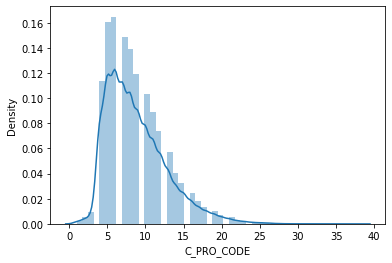

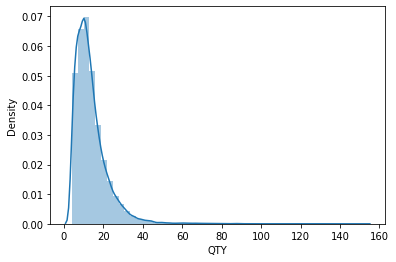

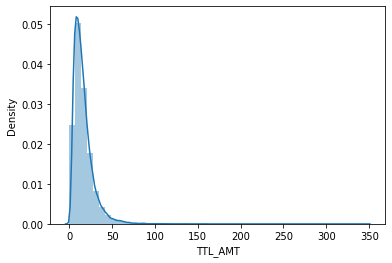

-------------------------------------- Full Shop ------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

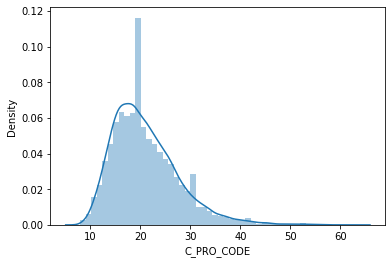

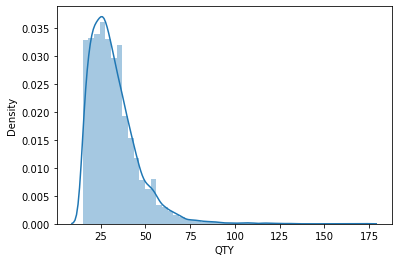

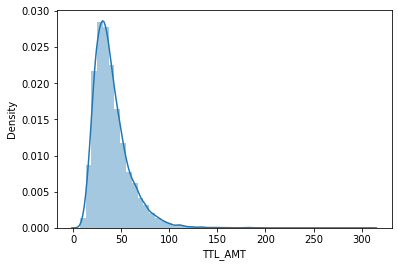

-------------------------------------- XX ------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

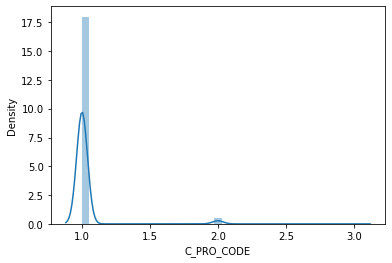

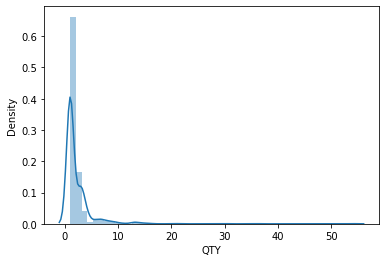

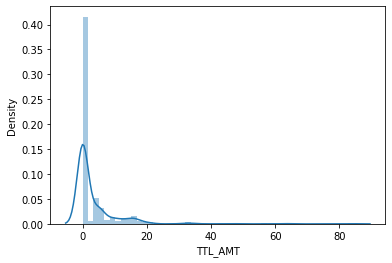

-------------------------------------- Small Shop ------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

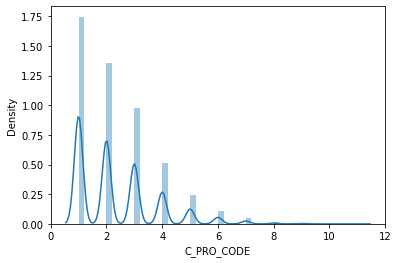

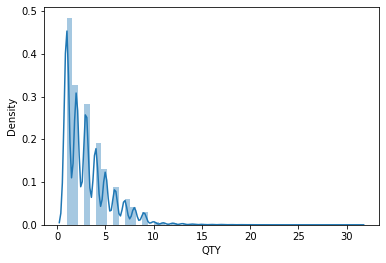

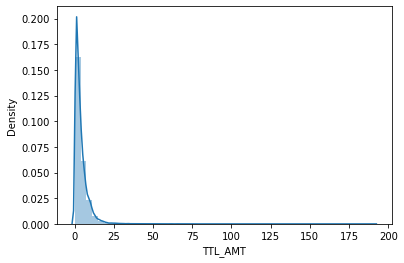

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist_bkt(df) :
  df_title = df["BASKET_TYPE"][0]
  print(f'-------------------------------------- {df_title} ------------------------------------------')
  for i, col in enumerate(df.columns[4:-6]):
      plt.figure(i)
      sns.distplot(df[col])
      
  plt.show()

ls_df_bkt_plot = [df_basket_top,df_basket_full,df_basket_xx,df_basket_sml]
for ii in ls_df_bkt_plot :
  plot_dist_bkt(ii)

## **PREPARATION : RATING SCORE FOR REPRESENT EACH BASKET TYPE**

In [7]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=462e4d5e1aadc862e295e82c194b6a65e5f3ea06c9f9996b11133239dea42e97
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [8]:
from pandasql import sqldf

In [9]:
pysqldf = lambda q: sqldf(q, globals())

In [10]:
df_basket_top.head(5)

CUST_CODE  SHOP_DATE  ...   STD_QTY STD_TTL_AMT
0  CUST0000607180   20060716  ...  8.781091   11.941499
1  CUST0000710863   20070802  ...  8.781091   11.941499
2  CUST0000550319   20070210  ...  8.781091   11.941499
3  CUST0000747393   20080129  ...  8.781091   11.941499
4  CUST0000938246   20061125  ...  8.781091   11.941499

[5 rows x 13 columns]

In [11]:
def gen_table_bkt_type(kkey ,df_main ) :
  KEY_BKT_KEY = kkey
  q_query = """SELECT 
  CUST_CODE , 
  COUNT(DISTINCT BASKET_ID) as NO_TXN_{} ,
  COUNT(DISTINCT SHOP_DATE) as NO_DAY_{} ,
  COUNT(DISTINCT SUBSTR(SHOP_DATE,1,6)) as NO_MTH_{}
  FROM df_basket_{}
  group by CUST_CODE
  ;
  """.format(KEY_BKT_KEY,KEY_BKT_KEY,KEY_BKT_KEY,KEY_BKT_KEY.lower())
  df_main_q1 = pysqldf(q_query)
  ls_do = ["AVG","MED","STD"]
  df_empty = pd.DataFrame()
  rnd = 0
  for ir in ls_do :
    dic_rename = {i:ir+"_"+i+"_"+kkey for i in ["C_PRO_CODE","QTY","TTL_AMT"]}
    print(dic_rename)
    if ir == "AVG" :
      df_main_q2 = df_main[["CUST_CODE","C_PRO_CODE","QTY","TTL_AMT"]].groupby(["CUST_CODE"]).mean().reset_index().rename({"index":"CUST_CODE"},axis=1).rename(dic_rename,axis=1)
    elif ir == "MED" :
      df_main_q2 = df_main[["CUST_CODE","C_PRO_CODE","QTY","TTL_AMT"]].groupby(["CUST_CODE"]).median().reset_index().rename({"index":"CUST_CODE"},axis=1).rename(dic_rename,axis=1)
    elif ir == "STD" :
      df_main_q2 = df_main[["CUST_CODE","C_PRO_CODE","QTY","TTL_AMT"]].groupby(["CUST_CODE"]).std().reset_index().rename({"index":"CUST_CODE"},axis=1).rename(dic_rename,axis=1)
    if rnd == 0 :
      df_empty = pd.concat([df_empty,df_main_q2],axis=1)
    else :
      df_empty = pd.concat([df_empty,df_main_q2.drop("CUST_CODE",axis=1)],axis=1)
    rnd += 1
  df_main_cust = df_main_q1.merge(df_empty,how="left",on="CUST_CODE")
  return df_main_cust

In [12]:
from datetime import datetime
sql_cust_date = '''
SELECT * FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.CUST_DATE_CUM`
'''
df_cust_date = pd.io.gbq.read_gbq(sql_cust_date , project_id=project_id, verbose=False, dialect="standard")
df_cust_date["FIRST_DATE"] = [datetime.strptime(str(i),'%Y%m%d') for i in df_cust_date["YYMM_DT_FIRST"].tolist()]
df_cust_date["END_DATE"] = [datetime.strptime(str(i),'%Y%m%d') for i in df_cust_date["YYMM_DT_LAST"].tolist()]
df_cust_date["DATE_DIFF"] = df_cust_date["END_DATE"]-df_cust_date["FIRST_DATE"]
df_cust_date["DAYS_STRECH"] = np.ceil(df_cust_date["DATE_DIFF"]/np.timedelta64(1,"D")+1)
df_cust_date["MTHS_STRECH"] = np.ceil(df_cust_date["DATE_DIFF"]/np.timedelta64(1,"M")+1)
df_cust_date_ok = df_cust_date[["CUST_CODE","DAYS_STRECH","MTHS_STRECH"]]

In [13]:
sql_cust_reg = '''
SELECT * FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.CUST_REGION`
'''
df_cust_reg = pd.io.gbq.read_gbq(sql_cust_reg , project_id=project_id, verbose=False, dialect="standard")

In [14]:
df_cust_reg_ok = df_cust_reg.pivot(index="CUST_CODE",columns="STORE_REGION",values = "NO_TXN").reset_index().fillna(0)[["CUST_CODE","E02","W01"]]
df_cust_reg_ok["TTL_TXN"] = df_cust_reg_ok["E02"]+df_cust_reg_ok["W01"]
df_cust_reg_ok["PC_E"] = df_cust_reg_ok["E02"]/df_cust_reg_ok["TTL_TXN"]
df_cust_reg_ok["PC_W"] = df_cust_reg_ok["W01"]/df_cust_reg_ok["TTL_TXN"]

In [15]:
df_cust_reg_ok.head(3)

STORE_REGION       CUST_CODE   E02    W01  TTL_TXN  PC_E  PC_W
0             CUST0000000181   1.0    0.0      1.0   1.0   0.0
1             CUST0000000369   0.0  220.0    220.0   0.0   1.0
2             CUST0000000689  16.0    0.0     16.0   1.0   0.0

In [16]:
df_cust_mkt_top = gen_table_bkt_type("TOP",df_basket_top).merge(df_cust_date_ok,how="left",on="CUST_CODE")
df_cust_mkt_full = gen_table_bkt_type("FULL",df_basket_full).merge(df_cust_date_ok,how="left",on="CUST_CODE")
df_cust_mkt_xx = gen_table_bkt_type("XX",df_basket_xx).merge(df_cust_date_ok,how="left",on="CUST_CODE")
df_cust_mkt_sml = gen_table_bkt_type("SML",df_basket_sml).merge(df_cust_date_ok,how="left",on="CUST_CODE")

{'C_PRO_CODE': 'AVG_C_PRO_CODE_TOP', 'QTY': 'AVG_QTY_TOP', 'TTL_AMT': 'AVG_TTL_AMT_TOP'}
{'C_PRO_CODE': 'MED_C_PRO_CODE_TOP', 'QTY': 'MED_QTY_TOP', 'TTL_AMT': 'MED_TTL_AMT_TOP'}
{'C_PRO_CODE': 'STD_C_PRO_CODE_TOP', 'QTY': 'STD_QTY_TOP', 'TTL_AMT': 'STD_TTL_AMT_TOP'}
{'C_PRO_CODE': 'AVG_C_PRO_CODE_FULL', 'QTY': 'AVG_QTY_FULL', 'TTL_AMT': 'AVG_TTL_AMT_FULL'}
{'C_PRO_CODE': 'MED_C_PRO_CODE_FULL', 'QTY': 'MED_QTY_FULL', 'TTL_AMT': 'MED_TTL_AMT_FULL'}
{'C_PRO_CODE': 'STD_C_PRO_CODE_FULL', 'QTY': 'STD_QTY_FULL', 'TTL_AMT': 'STD_TTL_AMT_FULL'}
{'C_PRO_CODE': 'AVG_C_PRO_CODE_XX', 'QTY': 'AVG_QTY_XX', 'TTL_AMT': 'AVG_TTL_AMT_XX'}
{'C_PRO_CODE': 'MED_C_PRO_CODE_XX', 'QTY': 'MED_QTY_XX', 'TTL_AMT': 'MED_TTL_AMT_XX'}
{'C_PRO_CODE': 'STD_C_PRO_CODE_XX', 'QTY': 'STD_QTY_XX', 'TTL_AMT': 'STD_TTL_AMT_XX'}
{'C_PRO_CODE': 'AVG_C_PRO_CODE_SML', 'QTY': 'AVG_QTY_SML', 'TTL_AMT': 'AVG_TTL_AMT_SML'}
{'C_PRO_CODE': 'MED_C_PRO_CODE_SML', 'QTY': 'MED_QTY_SML', 'TTL_AMT': 'MED_TTL_AMT_SML'}
{'C_PRO_CODE': 'STD_C

In [17]:
from scipy.stats import norm
df_cust_mkt_top["PROB_AVG_C_PRO_CODE_TOP"] = df_basket_top["AVG_C_PRO_CODE"][0]
df_cust_mkt_top["PROB_AVG_QTY_TOP"] = df_basket_top["AVG_QTY"][0]
df_cust_mkt_top["PROB_AVG_TTL_AMT_TOP"] = df_basket_top["AVG_TTL_AMT"][0]
df_cust_mkt_top["PROB_STD_C_PRO_CODE_TOP"] = df_basket_top["STD_C_PRO_CODE"][0]
df_cust_mkt_top["PROB_STD_QTY_TOP"] = df_basket_top["STD_QTY"][0]
df_cust_mkt_top["PROB_STD_TTL_AMT_TOP"] = df_basket_top["STD_TTL_AMT"][0]
df_cust_mkt_top["PC_DAY_COME_TOP"] = np.round((df_cust_mkt_top["NO_DAY_TOP"]/df_cust_mkt_top["DAYS_STRECH"])*100,2)
df_cust_mkt_top["PC_MTH_COME_TOP"] = np.round((df_cust_mkt_top["NO_MTH_TOP"]/df_cust_mkt_top["MTHS_STRECH"])*100,2)
df_cust_mkt_top["R_ACTDAY_TOP"] = norm.cdf((df_cust_mkt_top["PC_DAY_COME_TOP"]-np.mean(df_cust_mkt_top["PC_DAY_COME_TOP"]))/np.std(df_cust_mkt_top["PC_DAY_COME_TOP"]))
df_cust_mkt_top["R_ACTMTH_TOP"] = norm.cdf((df_cust_mkt_top["PC_MTH_COME_TOP"]-np.mean(df_cust_mkt_top["PC_MTH_COME_TOP"]))/np.std(df_cust_mkt_top["PC_MTH_COME_TOP"]))
df_cust_mkt_top["F_NOTXN_TOP"] = norm.cdf((df_cust_mkt_top["NO_TXN_TOP"]-np.mean(df_cust_mkt_top["NO_TXN_TOP"]))/np.std(df_cust_mkt_top["NO_TXN_TOP"]))
df_cust_mkt_top["M_TTLAMT_TOP"] = norm.cdf((df_cust_mkt_top["AVG_TTL_AMT_TOP"]-df_cust_mkt_top["PROB_AVG_TTL_AMT_TOP"])/(df_cust_mkt_top["PROB_STD_TTL_AMT_TOP"]))
df_cust_mkt_top["M_QTY_TOP"] = norm.cdf((df_cust_mkt_top["AVG_QTY_TOP"]-df_cust_mkt_top["PROB_AVG_QTY_TOP"])/(df_cust_mkt_top["PROB_STD_QTY_TOP"]))
df_cust_mkt_top_new = df_cust_mkt_top[["CUST_CODE","R_ACTDAY_TOP","R_ACTMTH_TOP","F_NOTXN_TOP","M_TTLAMT_TOP","M_QTY_TOP"]]
df_cust_mkt_top_new.head(5)

CUST_CODE  R_ACTDAY_TOP  ...  M_TTLAMT_TOP  M_QTY_TOP
0  CUST0000000369      0.370174  ...      0.237102   0.275093
1  CUST0000000689      0.334505  ...      0.278497   0.380645
2  CUST0000001163      0.325055  ...      0.595181   0.604733
3  CUST0000001194      0.393707  ...      0.658243   0.562099
4  CUST0000002637      0.336408  ...      0.340711   0.434630

[5 rows x 6 columns]

In [18]:
df_cust_mkt_full["PROB_AVG_C_PRO_CODE_FULL"] = df_basket_full["AVG_C_PRO_CODE"][0]
df_cust_mkt_full["PROB_AVG_QTY_FULL"] = df_basket_full["AVG_QTY"][0]
df_cust_mkt_full["PROB_AVG_TTL_AMT_FULL"] = df_basket_full["AVG_TTL_AMT"][0]
df_cust_mkt_full["PROB_STD_C_PRO_CODE_FULL"] = df_basket_full["STD_C_PRO_CODE"][0]
df_cust_mkt_full["PROB_STD_QTY_FULL"] = df_basket_full["STD_QTY"][0]
df_cust_mkt_full["PROB_STD_TTL_AMT_FULL"] = df_basket_full["STD_TTL_AMT"][0]
df_cust_mkt_full["PC_DAY_COME_FULL"] = np.round((df_cust_mkt_full["NO_DAY_FULL"]/df_cust_mkt_full["DAYS_STRECH"])*100,2)
df_cust_mkt_full["PC_MTH_COME_FULL"] = np.round((df_cust_mkt_full["NO_MTH_FULL"]/df_cust_mkt_full["MTHS_STRECH"])*100,2)
df_cust_mkt_full["R_ACTDAY_FULL"] = norm.cdf((df_cust_mkt_full["PC_DAY_COME_FULL"]-np.mean(df_cust_mkt_full["PC_DAY_COME_FULL"]))/np.std(df_cust_mkt_full["PC_DAY_COME_FULL"]))
df_cust_mkt_full["R_ACTMTH_FULL"] = norm.cdf((df_cust_mkt_full["PC_MTH_COME_FULL"]-np.mean(df_cust_mkt_full["PC_MTH_COME_FULL"]))/np.std(df_cust_mkt_full["PC_MTH_COME_FULL"]))
df_cust_mkt_full["F_NOTXN_FULL"] = norm.cdf((df_cust_mkt_full["NO_TXN_FULL"]-np.mean(df_cust_mkt_full["NO_TXN_FULL"]))/np.std(df_cust_mkt_full["NO_TXN_FULL"]))
df_cust_mkt_full["M_TTLAMT_FULL"] = norm.cdf((df_cust_mkt_full["AVG_TTL_AMT_FULL"]-df_cust_mkt_full["PROB_AVG_TTL_AMT_FULL"])/(df_cust_mkt_full["PROB_STD_TTL_AMT_FULL"]))
df_cust_mkt_full["M_QTY_FULL"] = norm.cdf((df_cust_mkt_full["AVG_QTY_FULL"]-df_cust_mkt_full["PROB_AVG_QTY_FULL"])/(df_cust_mkt_full["PROB_STD_QTY_FULL"]))
df_cust_mkt_full_new = df_cust_mkt_full[["CUST_CODE","R_ACTDAY_FULL","R_ACTMTH_FULL","F_NOTXN_FULL","M_TTLAMT_FULL","M_QTY_FULL"]]
df_cust_mkt_full_new.head(5)

CUST_CODE  R_ACTDAY_FULL  ...  M_TTLAMT_FULL  M_QTY_FULL
0  CUST0000000689       0.385180  ...       0.483206    0.704069
1  CUST0000001194       0.414797  ...       0.471082    0.336036
2  CUST0000003044       0.474757  ...       0.113142    0.165919
3  CUST0000003287       0.367714  ...       0.419040    0.487809
4  CUST0000004088       0.366752  ...       0.244053    0.420175

[5 rows x 6 columns]

In [19]:
df_cust_mkt_xx["PROB_AVG_C_PRO_CODE_XX"] = df_basket_xx["AVG_C_PRO_CODE"][0]
df_cust_mkt_xx["PROB_AVG_QTY_XX"] = df_basket_xx["AVG_QTY"][0]
df_cust_mkt_xx["PROB_AVG_TTL_AMT_XX"] = df_basket_xx["AVG_TTL_AMT"][0]
df_cust_mkt_xx["PROB_STD_C_PRO_CODE_XX"] = df_basket_xx["STD_C_PRO_CODE"][0]
df_cust_mkt_xx["PROB_STD_QTY_XX"] = df_basket_xx["STD_QTY"][0]
df_cust_mkt_xx["PROB_STD_TTL_AMT_XX"] = df_basket_xx["STD_TTL_AMT"][0]
df_cust_mkt_xx["PC_DAY_COME_XX"] = np.round((df_cust_mkt_xx["NO_DAY_XX"]/df_cust_mkt_xx["DAYS_STRECH"])*100,2)
df_cust_mkt_xx["PC_MTH_COME_XX"] = np.round((df_cust_mkt_xx["NO_MTH_XX"]/df_cust_mkt_xx["MTHS_STRECH"])*100,2)
df_cust_mkt_xx["R_ACTDAY_XX"] = norm.cdf((df_cust_mkt_xx["PC_DAY_COME_XX"]-np.mean(df_cust_mkt_xx["PC_DAY_COME_XX"]))/np.std(df_cust_mkt_xx["PC_DAY_COME_XX"]))
df_cust_mkt_xx["R_ACTMTH_XX"] = norm.cdf((df_cust_mkt_xx["PC_MTH_COME_XX"]-np.mean(df_cust_mkt_xx["PC_MTH_COME_XX"]))/np.std(df_cust_mkt_xx["PC_MTH_COME_XX"]))
df_cust_mkt_xx["F_NOTXN_XX"] = norm.cdf((df_cust_mkt_xx["NO_TXN_XX"]-np.mean(df_cust_mkt_xx["NO_TXN_XX"]))/np.std(df_cust_mkt_xx["NO_TXN_XX"]))
df_cust_mkt_xx["M_TTLAMT_XX"] = norm.cdf((df_cust_mkt_xx["AVG_TTL_AMT_XX"]-df_cust_mkt_xx["PROB_AVG_TTL_AMT_XX"])/(df_cust_mkt_xx["PROB_STD_TTL_AMT_XX"]))
df_cust_mkt_xx["M_QTY_XX"] = norm.cdf((df_cust_mkt_xx["AVG_QTY_XX"]-df_cust_mkt_xx["PROB_AVG_QTY_XX"])/(df_cust_mkt_xx["PROB_STD_QTY_XX"]))
df_cust_mkt_xx_new = df_cust_mkt_xx[["CUST_CODE","R_ACTDAY_XX","R_ACTMTH_XX","F_NOTXN_XX","M_TTLAMT_XX","M_QTY_XX"]]
df_cust_mkt_xx_new.head(5)

CUST_CODE  R_ACTDAY_XX  R_ACTMTH_XX  F_NOTXN_XX  M_TTLAMT_XX  M_QTY_XX
0  CUST0000004088     0.400309     0.406341    0.539021     0.332475  0.522439
1  CUST0000008415     0.400309     0.406341    0.539021     0.474392  0.431716
2  CUST0000011075     0.411105     0.587411    0.912022     0.332736  0.595516
3  CUST0000017325     0.396045     0.293937    0.343044     0.331833  0.344472
4  CUST0000019732     0.397578     0.328789    0.343044     0.337625  0.344472

In [20]:
df_cust_mkt_sml["PROB_AVG_C_PRO_CODE_SML"] = df_basket_sml["AVG_C_PRO_CODE"][0]
df_cust_mkt_sml["PROB_AVG_QTY_SML"] = df_basket_sml["AVG_QTY"][0]
df_cust_mkt_sml["PROB_AVG_TTL_AMT_SML"] = df_basket_sml["AVG_TTL_AMT"][0]
df_cust_mkt_sml["PROB_STD_C_PRO_CODE_SML"] = df_basket_sml["STD_C_PRO_CODE"][0]
df_cust_mkt_sml["PROB_STD_QTY_SML"] = df_basket_sml["STD_QTY"][0]
df_cust_mkt_sml["PROB_STD_TTL_AMT_SML"] = df_basket_sml["STD_TTL_AMT"][0]
df_cust_mkt_sml["PC_DAY_COME_SML"] = np.round((df_cust_mkt_sml["NO_DAY_SML"]/df_cust_mkt_sml["DAYS_STRECH"])*100,2)
df_cust_mkt_sml["PC_MTH_COME_SML"] = np.round((df_cust_mkt_sml["NO_MTH_SML"]/df_cust_mkt_sml["MTHS_STRECH"])*100,2)
df_cust_mkt_sml["R_ACTDAY_SML"] = norm.cdf((df_cust_mkt_sml["PC_DAY_COME_SML"]-np.mean(df_cust_mkt_sml["PC_DAY_COME_SML"]))/np.std(df_cust_mkt_sml["PC_DAY_COME_SML"]))
df_cust_mkt_sml["R_ACTMTH_SML"] = norm.cdf((df_cust_mkt_sml["PC_MTH_COME_SML"]-np.mean(df_cust_mkt_sml["PC_MTH_COME_SML"]))/np.std(df_cust_mkt_sml["PC_MTH_COME_SML"]))
df_cust_mkt_sml["F_NOTXN_SML"] = norm.cdf((df_cust_mkt_sml["NO_TXN_SML"]-np.mean(df_cust_mkt_sml["NO_TXN_SML"]))/np.std(df_cust_mkt_sml["NO_TXN_SML"]))
df_cust_mkt_sml["M_TTLAMT_SML"] = norm.cdf((df_cust_mkt_sml["AVG_TTL_AMT_SML"]-df_cust_mkt_sml["PROB_AVG_TTL_AMT_SML"])/(df_cust_mkt_sml["PROB_STD_TTL_AMT_SML"]))
df_cust_mkt_sml["M_QTY_SML"] = norm.cdf((df_cust_mkt_sml["AVG_QTY_SML"]-df_cust_mkt_sml["PROB_AVG_QTY_SML"])/(df_cust_mkt_sml["PROB_STD_QTY_SML"]))
df_cust_mkt_sml_new = df_cust_mkt_sml[["CUST_CODE","R_ACTDAY_SML","R_ACTMTH_SML","F_NOTXN_SML","M_TTLAMT_SML","M_QTY_SML"]]
df_cust_mkt_sml_new.head(5)

CUST_CODE  R_ACTDAY_SML  ...  M_TTLAMT_SML  M_QTY_SML
0  CUST0000000181      0.937254  ...      0.357811   0.177457
1  CUST0000000369      0.391429  ...      0.450912   0.522511
2  CUST0000000689      0.243204  ...      0.429263   0.402775
3  CUST0000000998      0.265980  ...      0.323514   0.308267
4  CUST0000001163      0.235135  ...      0.224298   0.177457

[5 rows x 6 columns]

In [21]:
cust_code_key = list(set([j for i in [df_cust_mkt_top_new,df_cust_mkt_full_new,df_cust_mkt_xx_new,df_cust_mkt_sml_new] for j in i["CUST_CODE"].tolist()]))
cust_code_key.sort()
data_super_main = pd.DataFrame({"CUST_CODE":cust_code_key})
data_frames = [df_cust_mkt_top_new,df_cust_mkt_full_new,df_cust_mkt_xx_new,df_cust_mkt_sml_new] #df_cust_reg_ok

In [22]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['CUST_CODE'],
                                            how='outer'), data_frames)

In [23]:
df_merged = df_merged.fillna(0)

In [24]:
df_merged["R_TOP"] = np.round(((df_merged["R_ACTDAY_TOP"]+df_merged["R_ACTMTH_TOP"])/2)/0.2,1)
df_merged["F_TOP"] = np.round(((df_merged["F_NOTXN_TOP"]+df_merged["M_QTY_TOP"])/2)/0.2,1)
df_merged["M_TOP"] = np.round((df_merged["M_TTLAMT_TOP"])/0.2,1)
df_merged["R_FULL"] = np.round(((df_merged["R_ACTDAY_FULL"]+df_merged["R_ACTMTH_FULL"])/2)/0.2,1)
df_merged["F_FULL"] = np.round(((df_merged["F_NOTXN_FULL"]+df_merged["M_QTY_FULL"])/2)/0.2,1)
df_merged["M_FULL"] = np.round((df_merged["M_TTLAMT_FULL"])/0.2,1)
df_merged["R_XX"] = np.round(((df_merged["R_ACTDAY_XX"]+df_merged["R_ACTMTH_XX"])/2)/0.2,1)
df_merged["F_XX"] = np.round(((df_merged["F_NOTXN_XX"]+df_merged["M_QTY_XX"])/2)/0.2,1)
df_merged["M_XX"] = np.round((df_merged["M_TTLAMT_XX"])/0.2,1)
df_merged["R_SML"] = np.round(((df_merged["R_ACTDAY_SML"]+df_merged["R_ACTMTH_SML"])/2)/0.2,1)
df_merged["F_SML"] = np.round(((df_merged["F_NOTXN_SML"]+df_merged["M_QTY_SML"])/2)/0.2,1)
df_merged["M_SML"] = np.round((df_merged["M_TTLAMT_SML"])/0.2,1)


In [25]:
df_merged_ok = df_merged[["CUST_CODE", 'R_TOP', 'F_TOP', 'M_TOP', 'R_FULL','F_FULL', 'M_FULL', 'R_XX', 'F_XX', 'M_XX', 'R_SML', 'F_SML', 'M_SML']]

## **PREPARATION : OVERVIEW ALL COMPARE PORT**

In [26]:
sql_summary = '''
SELECT * FROM `windy-ripsaw-309202.DATA_FOR_CLUSTER.SUM_TXN_DATA`
'''
df_summary_prep = pd.io.gbq.read_gbq(sql_summary , project_id=project_id, verbose=False, dialect="standard")

### **PER DAY**

In [27]:
q2_query = """
SELECT
CUSTOMER_NO as CUST_CODE , 
PIR_PURCH_DT as SHOP_DATE ,
AVG(C_PROD_CODE) as AVG_C_PROD_CODE_DAY ,
SUM(QUANTITY) as AVG_QTY_DAY ,
SUM(AMT) as AVG_SPEDING_DAY 
FROM df_summary_prep
group by CUST_CODE , PIR_PURCH_DT
;
"""
df_overview_day  = pysqldf(q2_query)

In [28]:
df_overview_day_mean = df_overview_day.groupby("CUST_CODE").mean().reset_index().rename({"index":"CUST_CODE"},axis=1).drop("SHOP_DATE",axis=1)
df_overview_day_std = df_overview_day.groupby("CUST_CODE").std().reset_index().rename({
    "index":"CUST_CODE",
    "AVG_C_PROD_CODE_DAY" : "STD_C_PROD_CODE_DAY" ,
    "AVG_QTY_DAY" : "STD_QTY_DAY" ,
    "AVG_SPEDING_DAY" : "STD_SPEDING_DAY"
    },axis=1).drop("SHOP_DATE",axis=1)

In [29]:
df_overview_day_ok = df_overview_day_mean.merge(df_overview_day_std,how="left",on="CUST_CODE").fillna(0)
df_overview_day_ok.head(5)

CUST_CODE  AVG_C_PROD_CODE_DAY  ...  STD_QTY_DAY  STD_SPEDING_DAY
0  CUST0000000181             1.000000  ...     0.000000         0.000000
1  CUST0000000369             3.159722  ...     3.797126         4.756787
2  CUST0000000689            11.562500  ...    21.096208        19.922842
3  CUST0000000998             1.333333  ...     1.000000         1.187196
4  CUST0000001163             6.250000  ...     8.660254        11.022926

[5 rows x 7 columns]

### **PER MTH**

In [30]:
q3_query = """
SELECT
CUSTOMER_NO as CUST_CODE , 
SUBSTR(PIR_PURCH_DT,1,6) as YYMM_MTH ,
AVG(C_PROD_CODE) as AVG_C_PROD_CODE_MTH ,
SUM(QUANTITY) as AVG_QTY_MTH ,
SUM(AMT) as AVG_SPENDING_MTH 
FROM df_summary_prep
group by CUST_CODE , SUBSTR(PIR_PURCH_DT,1,6)
;
"""
df_overview_mth  = pysqldf(q3_query)

In [31]:
df_overview_mth

CUST_CODE YYMM_MTH  ...  AVG_QTY_MTH  AVG_SPENDING_MTH
0      CUST0000000181   200701  ...            1              2.44
1      CUST0000000369   200604  ...           15             20.64
2      CUST0000000369   200605  ...           40             52.85
3      CUST0000000369   200606  ...           49             42.61
4      CUST0000000369   200607  ...           62             97.72
...               ...      ...  ...          ...               ...
38539  CUST0000999936   200608  ...            1              0.98
38540  CUST0000999936   200609  ...            1              1.88
38541  CUST0000999936   200703  ...            9              6.11
38542  CUST0000999936   200705  ...            6              5.80
38543  CUST0000999936   200804  ...            4              2.90

[38544 rows x 5 columns]

In [32]:
df_overview_mth_mean = df_overview_mth.groupby("CUST_CODE").mean().reset_index().rename({"index":"CUST_CODE"},axis=1)
df_overview_mth_std = df_overview_mth.groupby("CUST_CODE").std().reset_index().rename({
    "index":"CUST_CODE",
    "AVG_C_PROD_CODE_MTH" : "STD_C_PROD_CODE_MTH" ,
    "AVG_QTY_MTH" : "STD_QTY_MTH" ,
    "AVG_SPENDING_MTH" : "STD_SPENDING_MTH"
    },axis=1)

In [33]:
df_overview_mth_ok = df_overview_mth_mean.merge(df_overview_mth_std,how="left",on="CUST_CODE").fillna(0)
df_overview_mth_ok.head(5)

CUST_CODE  AVG_C_PROD_CODE_MTH  ...  STD_QTY_MTH  STD_SPENDING_MTH
0  CUST0000000181             1.000000  ...     0.000000          0.000000
1  CUST0000000369             3.132612  ...    16.720983         20.821317
2  CUST0000000689            11.455556  ...    36.353970         38.303583
3  CUST0000000998             1.250000  ...     0.000000          3.019346
4  CUST0000001163             6.250000  ...     8.660254         11.022926

[5 rows x 7 columns]

### **PER TXN**

In [34]:
df_overview_txn = df_summary_prep[["CUSTOMER_NO","C_PROD_CODE","QUANTITY","AMT"]]

In [35]:
df_overview_txn_mean = df_overview_txn.groupby("CUSTOMER_NO").mean().reset_index().rename({
    "index":"CUST_CODE",
    "CUSTOMER_NO":"CUST_CODE",
    "C_PROD_CODE":"C_PROD_CODE_TXN",
    "QUANTITY" : "QTY_TXN" ,
    "AMT" : "TK_SIZE"
    },axis=1)
df_overview_txn_std = df_overview_txn.groupby("CUSTOMER_NO").std().reset_index().rename({
    "index":"CUST_CODE",
    "CUSTOMER_NO":"CUST_CODE",
    "C_PROD_CODE" : "STD_C_PROD_CODE_TXN" ,
    "QUANTITY" : "STD_QTY_TXN" ,
    "AMT" : "STD_TK_SIZE"
    },axis=1)

In [36]:
df_overview_txn_ok = df_overview_txn_mean.merge(df_overview_txn_std,how="left",on="CUST_CODE").fillna(0)
df_overview_txn_ok.head(5)

CUST_CODE  C_PROD_CODE_TXN  ...  STD_QTY_TXN  STD_TK_SIZE
0  CUST0000000181         1.000000  ...     0.000000     0.000000
1  CUST0000000369         3.177273  ...     2.905353     4.100078
2  CUST0000000689        11.562500  ...    21.096208    19.922842
3  CUST0000000998         1.333333  ...     1.000000     1.187196
4  CUST0000001163         6.250000  ...     8.660254    11.022926

[5 rows x 7 columns]

### **FUSION DATA**

In [37]:
cust_code_key_ovv = list(set([j for i in [df_overview_txn_ok,df_overview_day_ok,df_overview_mth_ok] for j in i["CUST_CODE"].tolist()]))
cust_code_key_ovv.sort()
data_super_main_ovv = pd.DataFrame({"CUST_CODE":cust_code_key_ovv})
data_frames_ovv = [df_overview_txn_ok,df_overview_day_ok,df_overview_mth_ok]
df_merged_ovv = reduce(lambda  left,right: pd.merge(left,right,on=['CUST_CODE'],
                                            how='outer'), data_frames_ovv)

In [38]:
df_preb_ok = df_merged_ovv.merge(df_merged_ok,how="left",on="CUST_CODE")
df_preb_ok.shape

(6100, 31)

In [39]:
df_preb_ok

CUST_CODE  C_PROD_CODE_TXN    QTY_TXN  ...  R_SML  F_SML  M_SML
0     CUST0000000181         1.000000   1.000000  ...    4.6    1.3    1.8
1     CUST0000000369         3.177273   4.195455  ...    3.2    3.8    2.3
2     CUST0000000689        11.562500  20.875000  ...    1.4    2.0    2.1
3     CUST0000000998         1.333333   2.000000  ...    1.7    1.7    1.6
4     CUST0000001163         6.250000   8.500000  ...    0.8    1.4    1.1
...              ...              ...        ...  ...    ...    ...    ...
6095  CUST0000999593         9.900000  13.166667  ...    1.0    2.2    2.0
6096  CUST0000999645         5.454545   8.272727  ...    1.0    2.1    2.6
6097  CUST0000999654         4.000000   6.000000  ...    0.0    0.0    0.0
6098  CUST0000999935        11.238095  16.333333  ...    1.2    2.2    1.9
6099  CUST0000999936         2.500000   3.500000  ...    0.9    2.2    1.8

[6100 rows x 31 columns]

In [40]:
# # ANOVA - TEST FOR SELECT VARIABLE
# ls_col_test_all = df_preb_ok.columns[1:]
# for i in ls_col_test_all :
#   print("####################################" + i + "#####################################")
#   print()
#   model = ols(i+' ~ C(BASKET_TYPE)', data=df_preb_ok).fit()
#   anova_table = sm.stats.anova_lm(model, typ=2)
#   print(anova_table)
#   print()

## **MODEL : CLUSTERING , RANDOM FOREST**

In [41]:
from sklearn.preprocessing import StandardScaler

df_std = pd.DataFrame(StandardScaler().fit_transform(df_preb_ok[df_preb_ok.columns[1:]]))
df_std.head(5)

0         1         2   ...        27        28        29
0 -0.769895 -0.725780 -0.580198  ...  1.535323 -0.588436 -0.126816
1 -0.370435 -0.379707 -0.434857  ...  0.685175  1.824613  0.285362
2  1.167989  1.426714  0.789187  ... -0.407872  0.087218  0.120491
3 -0.708739 -0.617478 -0.614756  ... -0.225697 -0.202348 -0.291687
4  0.193313  0.086482 -0.013014  ... -0.772221 -0.491914 -0.703864

[5 rows x 30 columns]

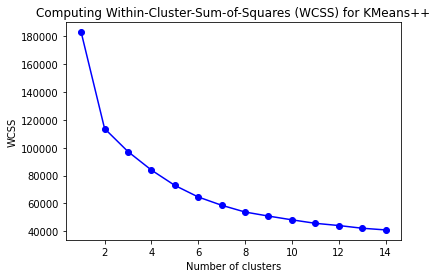

In [42]:
from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
N = range(1, 15)
for i in N:
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit_predict(df_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(N, wcss, 'bo-')
plt.title("Computing Within-Cluster-Sum-of-Squares (WCSS) for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [43]:
#let's choose k = 7
cluster = KMeans(n_clusters=7)
df_preb_ok['cluster'] = cluster.fit_predict(df_std)

In [44]:
dfCluster = df_preb_ok.groupby('cluster', as_index=False).mean()
dfCluster['NO_CUST'] = df_preb_ok[['cluster','CUST_CODE']].groupby('cluster').count()

dfCluster

cluster  C_PROD_CODE_TXN    QTY_TXN  ...     F_SML     M_SML  NO_CUST
0        0         5.000733   7.213141  ...  2.557463  2.671642     1206
1        1        12.340787  18.895562  ...  2.043042  2.343042      618
2        2         8.835823  13.327445  ...  0.002539  0.001953      512
3        3        10.731873  17.313651  ...  3.232677  2.774016      254
4        4        22.717943  35.723241  ...  0.009341  0.013736      182
5        5         1.831350   2.368609  ...  1.870340  1.948707     2940
6        6         3.277090   4.937648  ...  2.523196  2.090464      388

[7 rows x 32 columns]

<Figure size 432x288 with 0 Axes>

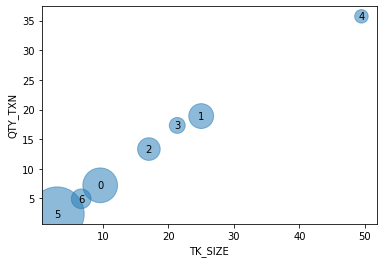

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
fig, ax = plt.subplots()
ax.scatter(dfCluster['TK_SIZE'], dfCluster['QTY_TXN'], s=dfCluster['NO_CUST'], alpha = 0.5)
ax.set_xlabel("TK_SIZE")
ax.set_ylabel("QTY_TXN")

for i, txt in enumerate(dfCluster['cluster']):
  ax.annotate(txt, (dfCluster['TK_SIZE'][i], dfCluster["QTY_TXN"][i]), horizontalalignment='center', verticalalignment='center')

plt.show()

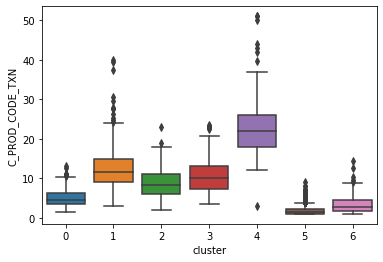

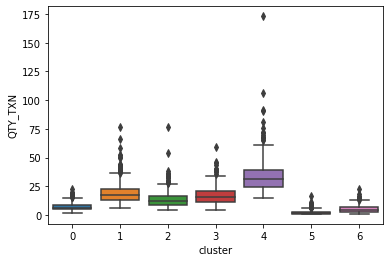

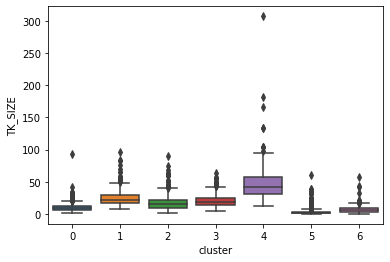

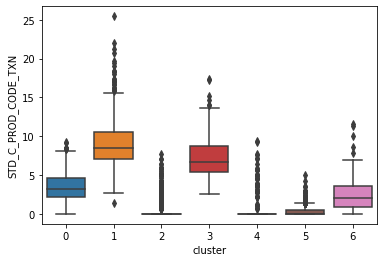

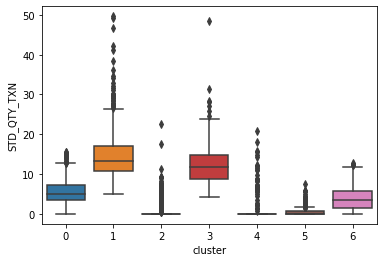

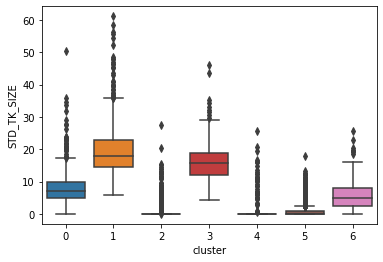

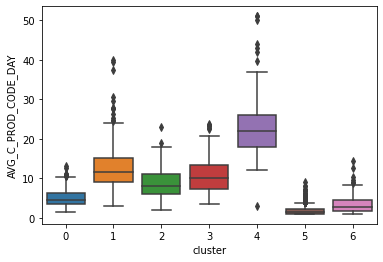

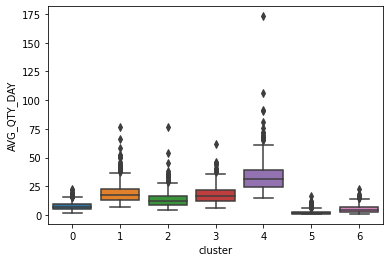

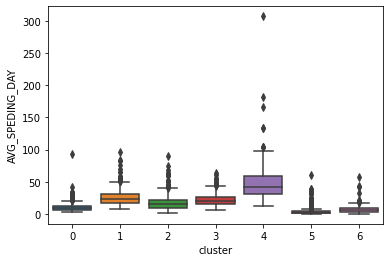

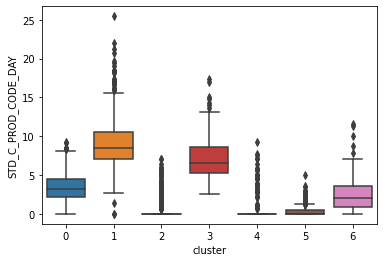

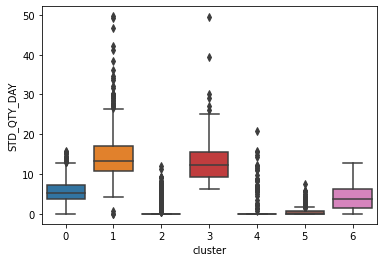

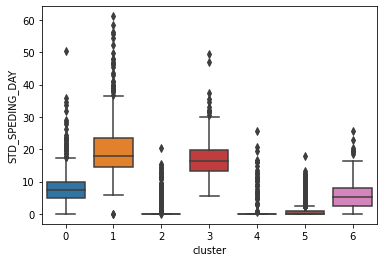

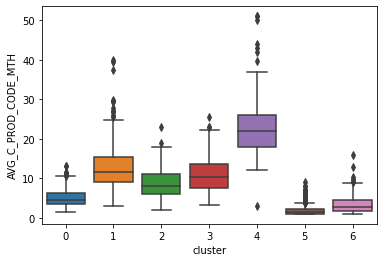

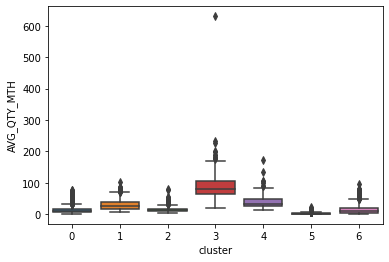

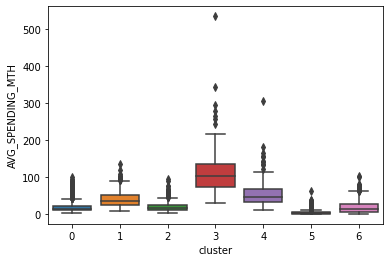

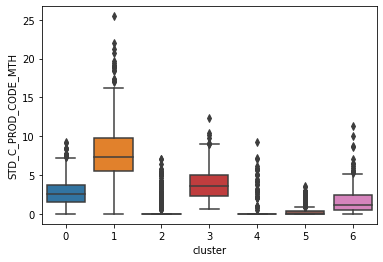

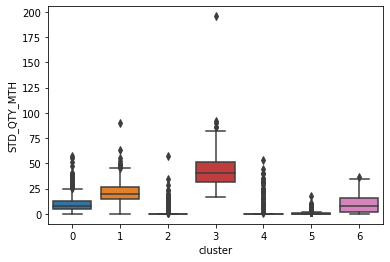

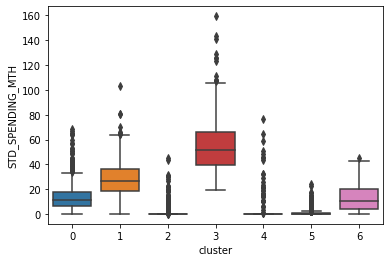

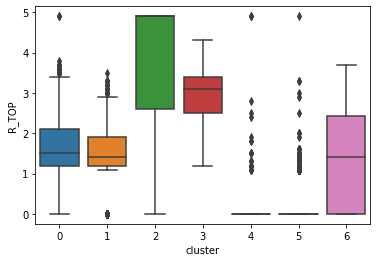

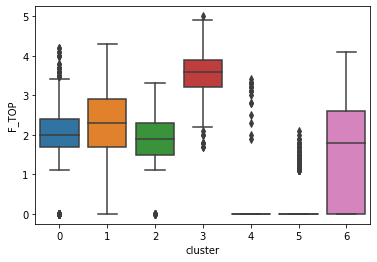

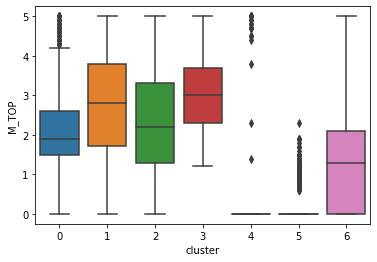

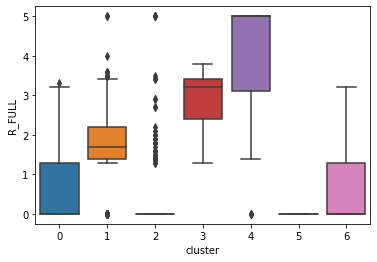

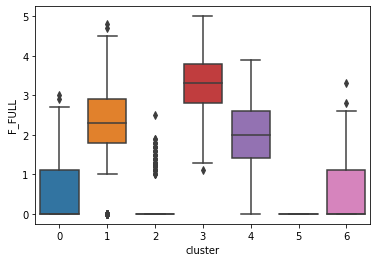

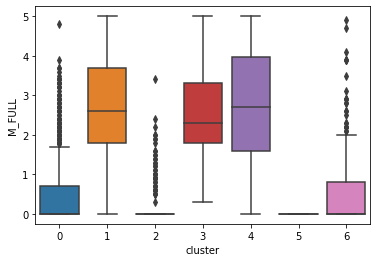

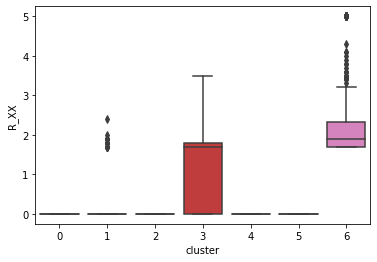

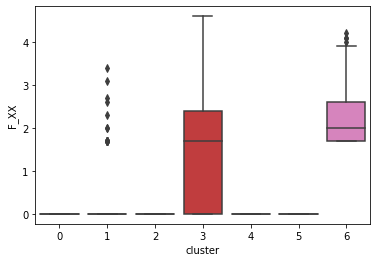

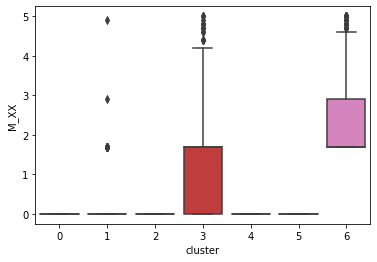

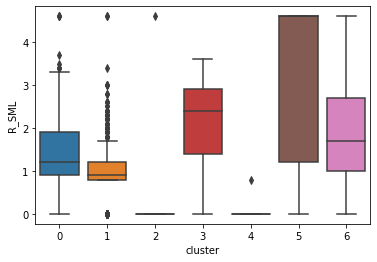

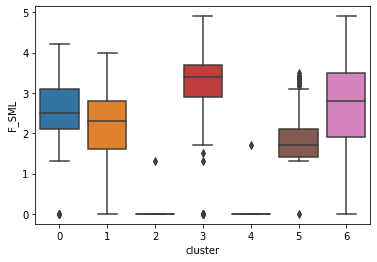

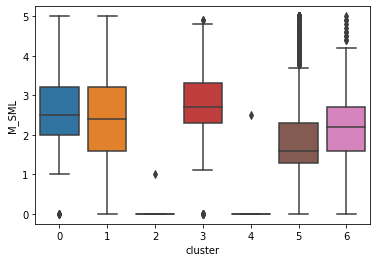

In [46]:
for i, col in enumerate(df_preb_ok.columns[1:-1]):
    sns.boxplot(x="cluster", y =col, data=df_preb_ok)
    plt.show()

In [47]:
df_preb_ok.head(2)

CUST_CODE  C_PROD_CODE_TXN   QTY_TXN  ...  F_SML  M_SML  cluster
0  CUST0000000181         1.000000  1.000000  ...    1.3    1.8        5
1  CUST0000000369         3.177273  4.195455  ...    3.8    2.3        0

[2 rows x 32 columns]

In [48]:
# ANOVA - TEST FOR SELECT VARIABLE
ls_col_test_all = df_preb_ok.columns[1:]
for i in ls_col_test_all :
  print("####################################" + i + "#####################################")
  print()
  model = ols(i+' ~ C(cluster)', data=df_preb_ok).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  # if anova_table[["PR(>F)"]].iloc[0,0] >= 0.5 :
  print(anova_table[["PR(>F)"]].iloc[0,0])
  print()

####################################C_PROD_CODE_TXN#####################################

0.0

####################################QTY_TXN#####################################

0.0

####################################TK_SIZE#####################################

0.0

####################################STD_C_PROD_CODE_TXN#####################################

0.0

####################################STD_QTY_TXN#####################################

0.0

####################################STD_TK_SIZE#####################################

0.0

####################################AVG_C_PROD_CODE_DAY#####################################

0.0

####################################AVG_QTY_DAY#####################################

0.0

####################################AVG_SPEDING_DAY#####################################

0.0

####################################STD_C_PROD_CODE_DAY#####################################

0.0

####################################STD_QTY_DAY###################

## **RANDOM FOREST**

In [49]:
from sklearn.ensemble import RandomForestClassifier

predictors = df_preb_ok.iloc[:,1:-1]
targets = df_preb_ok.iloc[:,-1:]

scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 123 )
classifier.fit(predictors_scaled, targets.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [50]:
importances = list(classifier.feature_importances_)

feature_list = list(predictors.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: M_TOP                Importance: 0.08
Variable: F_TOP                Importance: 0.07
Variable: STD_C_PROD_CODE_TXN  Importance: 0.05
Variable: STD_QTY_DAY          Importance: 0.05
Variable: R_TOP                Importance: 0.05
Variable: M_XX                 Importance: 0.05
Variable: F_SML                Importance: 0.05
Variable: STD_QTY_TXN          Importance: 0.04
Variable: AVG_C_PROD_CODE_DAY  Importance: 0.04
Variable: F_FULL               Importance: 0.04
Variable: R_XX                 Importance: 0.04
Variable: F_XX                 Importance: 0.04
Variable: STD_TK_SIZE          Importance: 0.03
Variable: STD_C_PROD_CODE_DAY  Importance: 0.03
Variable: AVG_C_PROD_CODE_MTH  Importance: 0.03
Variable: AVG_QTY_MTH          Importance: 0.03
Variable: R_SML                Importance: 0.03
Variable: M_SML                Importance: 0.03
Variable: C_PROD_CODE_TXN      Importance: 0.02
Variable: QTY_TXN              Importance: 0.02
Variable: TK_SIZE              Importanc

In [51]:
select_feature = [i[0] for i in feature_importances if i[1] >= 0.05]
select_feature.append("TK_SIZE")

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
predictors_dcs_tree = df_preb_ok[select_feature]
targets_dcs_tree= df_preb_ok.iloc[:,-1:]

In [53]:
targets_dcs_tree["Focus_Cls0"] = np.where(targets_dcs_tree["cluster"] == 0 , 1 , 0)
targets_dcs_tree["Focus_Cls1"] = np.where(targets_dcs_tree["cluster"] == 1 , 1 , 0)
targets_dcs_tree["Focus_Cls2"] = np.where(targets_dcs_tree["cluster"] == 2 , 1 , 0)
targets_dcs_tree["Focus_Cls3"] = np.where(targets_dcs_tree["cluster"] == 3 , 1 , 0)
targets_dcs_tree["Focus_Cls4"] = np.where(targets_dcs_tree["cluster"] == 4 , 1 , 0)
targets_dcs_tree["Focus_Cls5"] = np.where(targets_dcs_tree["cluster"] == 5 , 1 , 0)
targets_dcs_tree["Focus_Cls6"] = np.where(targets_dcs_tree["cluster"] == 6 , 1 , 0)
targets_dcs_tree.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

cluster  Focus_Cls0  Focus_Cls1  ...  Focus_Cls4  Focus_Cls5  Focus_Cls6
0        5           0           0  ...           0           1           0
1        0           1           0  ...           0           0           0
2        1           0           1  ...           0           0           0

[3 rows x 8 columns]

In [54]:
dcs_tree_c0 = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_c0.fit(predictors_dcs_tree, targets_dcs_tree[["Focus_Cls0"]])
dcs_tree_c1 = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_c1.fit(predictors_dcs_tree, targets_dcs_tree[["Focus_Cls1"]])
dcs_tree_c2 = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_c2.fit(predictors_dcs_tree, targets_dcs_tree[["Focus_Cls2"]])
dcs_tree_c3 = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_c3.fit(predictors_dcs_tree, targets_dcs_tree[["Focus_Cls3"]])
dcs_tree_c4 = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_c4.fit(predictors_dcs_tree, targets_dcs_tree[["Focus_Cls4"]])
dcs_tree_c5 = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_c5.fit(predictors_dcs_tree, targets_dcs_tree[["Focus_Cls5"]])
dcs_tree_c6 = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_c6.fit(predictors_dcs_tree, targets_dcs_tree[["Focus_Cls6"]])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
# Export as dot file
ls_gen_tree = [dcs_tree_c0,dcs_tree_c1,dcs_tree_c2,dcs_tree_c3,dcs_tree_c4,dcs_tree_c5,dcs_tree_c6]
for ii in range(7) :
  export_graphviz(ls_gen_tree[ii], 
                  out_file= f'DCS_TREE_CLS{ii}.dot', 
                  feature_names = select_feature,
                  class_names = [str(i) for i in list(set(targets_dcs_tree["Focus_Cls"+str(ii)].tolist()))],
                  rounded = True, proportion = False, 
                  precision = 2, filled = True)
  call(['dot', '-Tpng', f'DCS_TREE_CLS{ii}.dot', '-o', f'DCS_TREE_CLS{ii}.png', '-Gdpi=600'])

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'DCS_TREE_CLS0.png')

In [ ]:
Image(filename = 'DCS_TREE_CLS1.png')

In [ ]:
Image(filename = 'DCS_TREE_CLS2.png')

In [ ]:
Image(filename = 'DCS_TREE_CLS3.png')

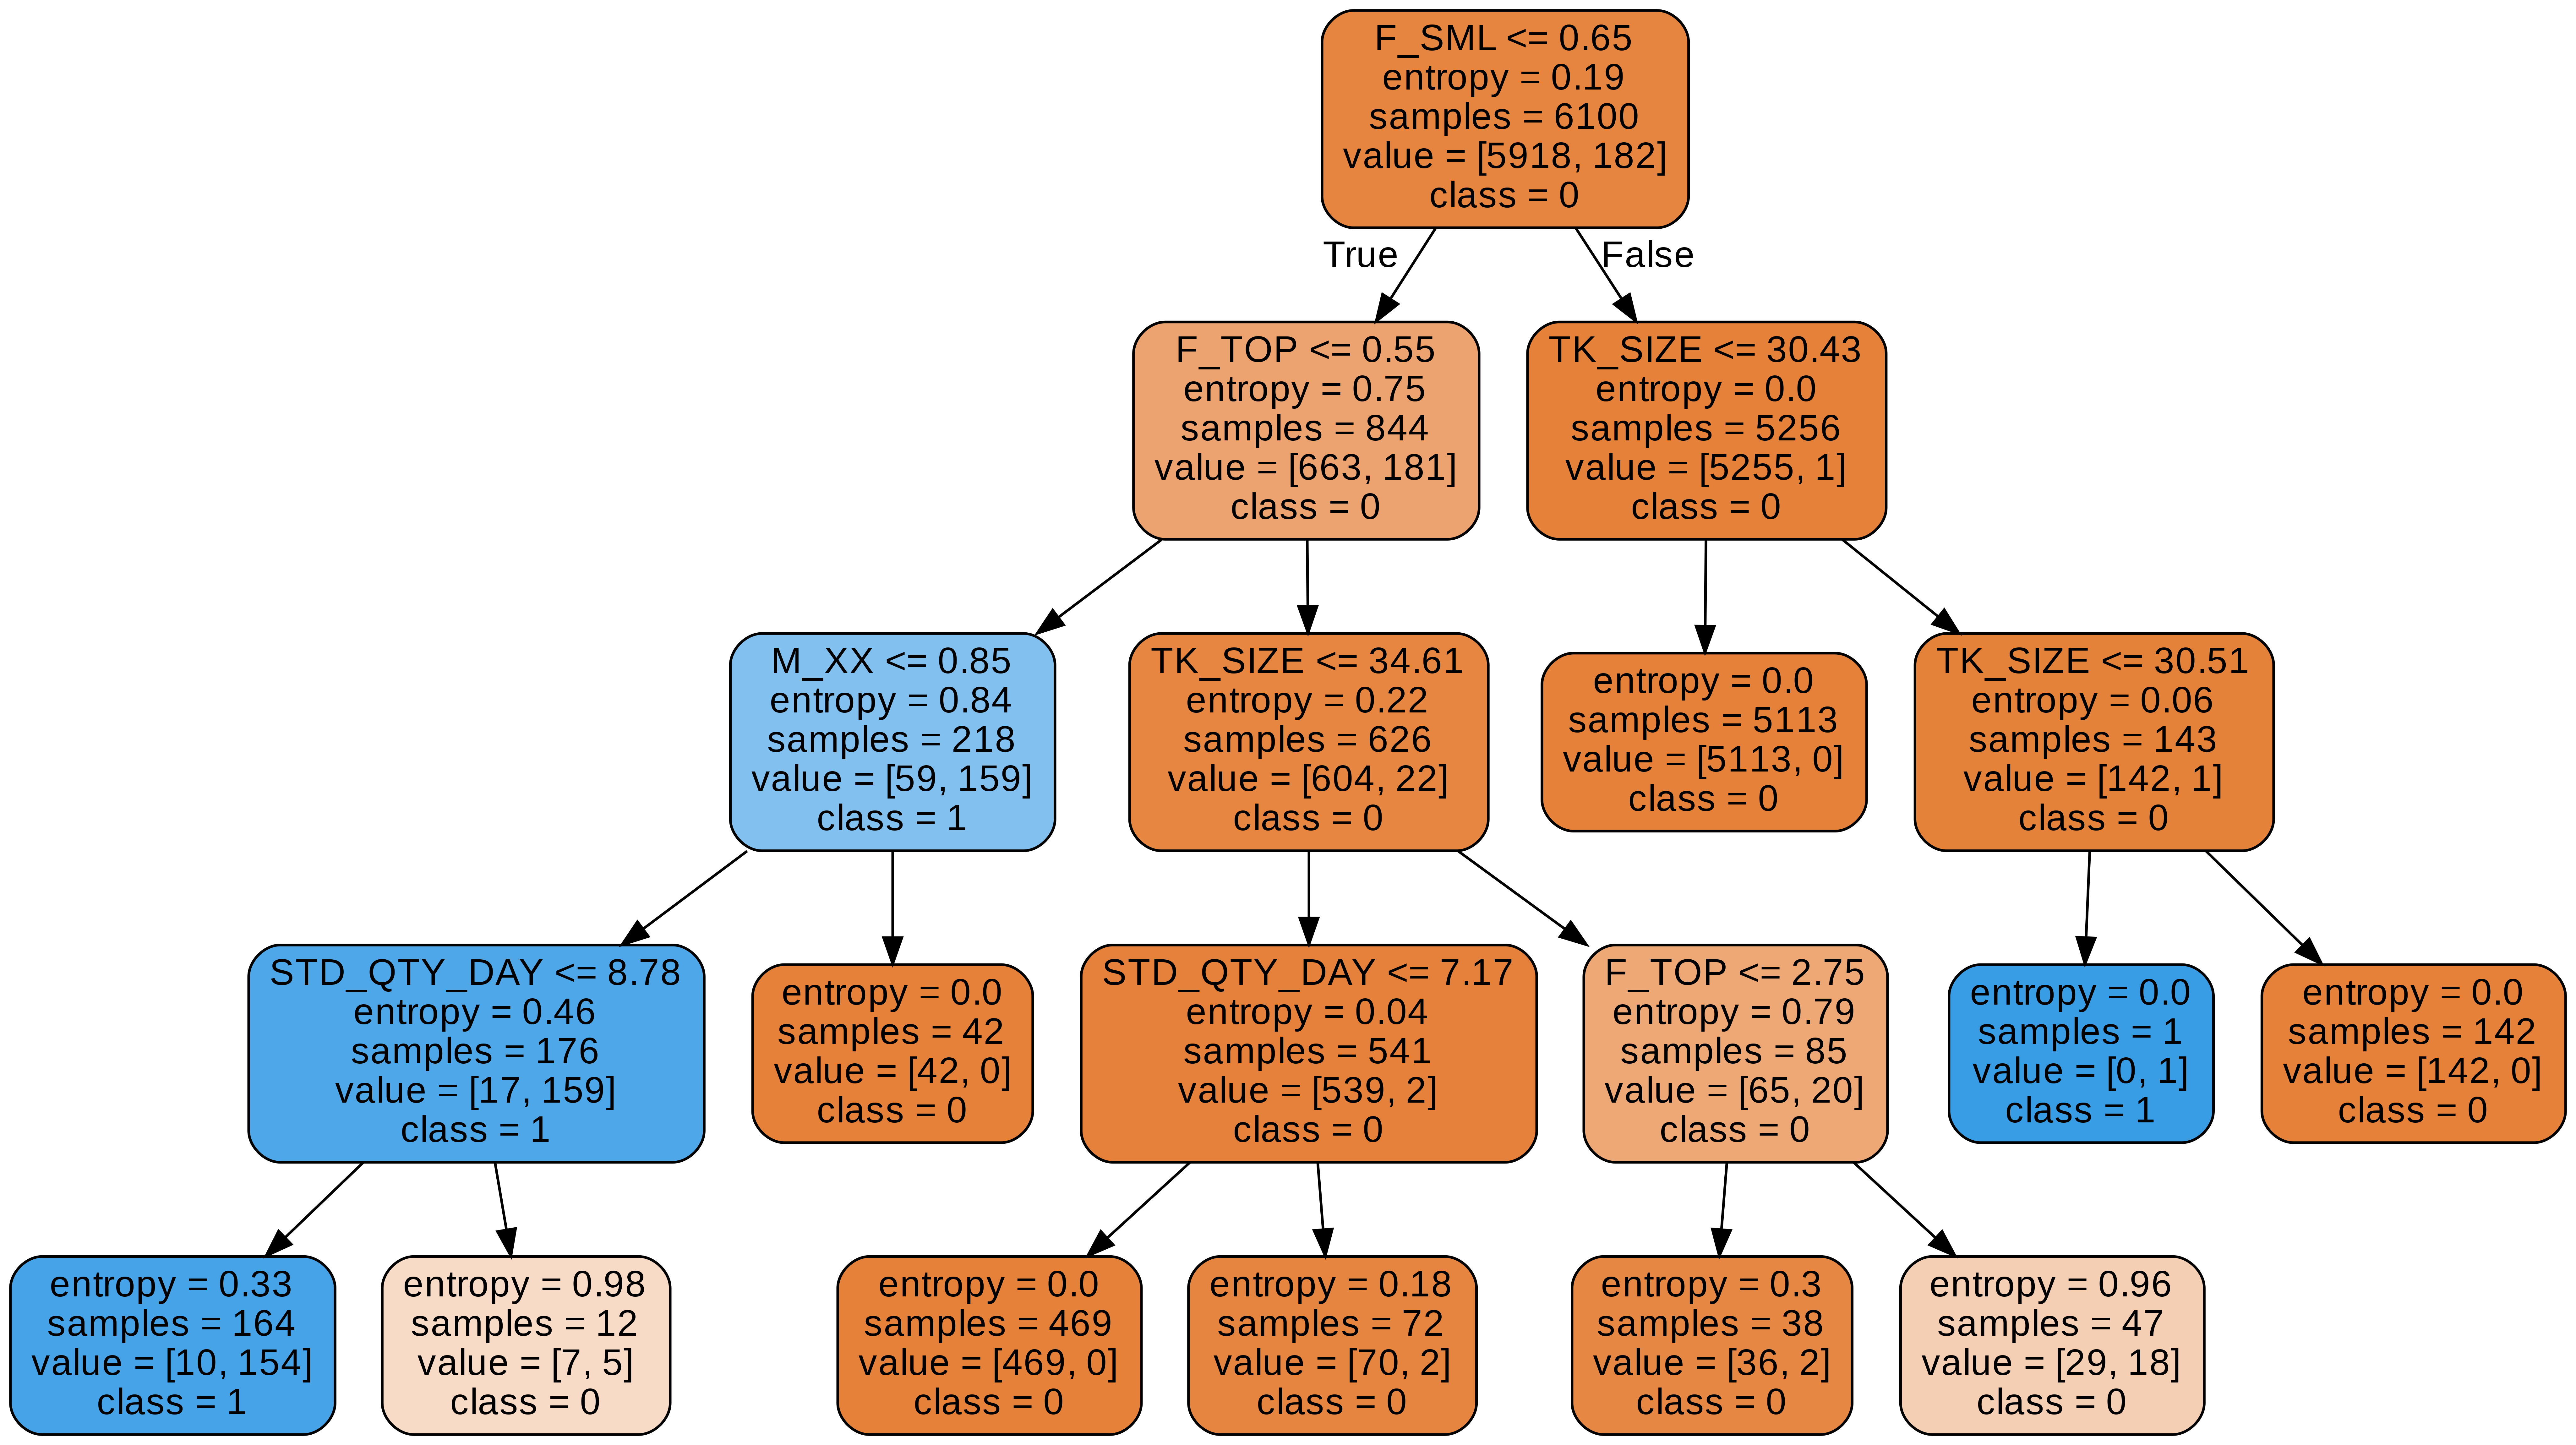

In [ ]:
Image(filename = 'DCS_TREE_CLS4.png')

In [ ]:
Image(filename = 'DCS_TREE_CLS5.png')

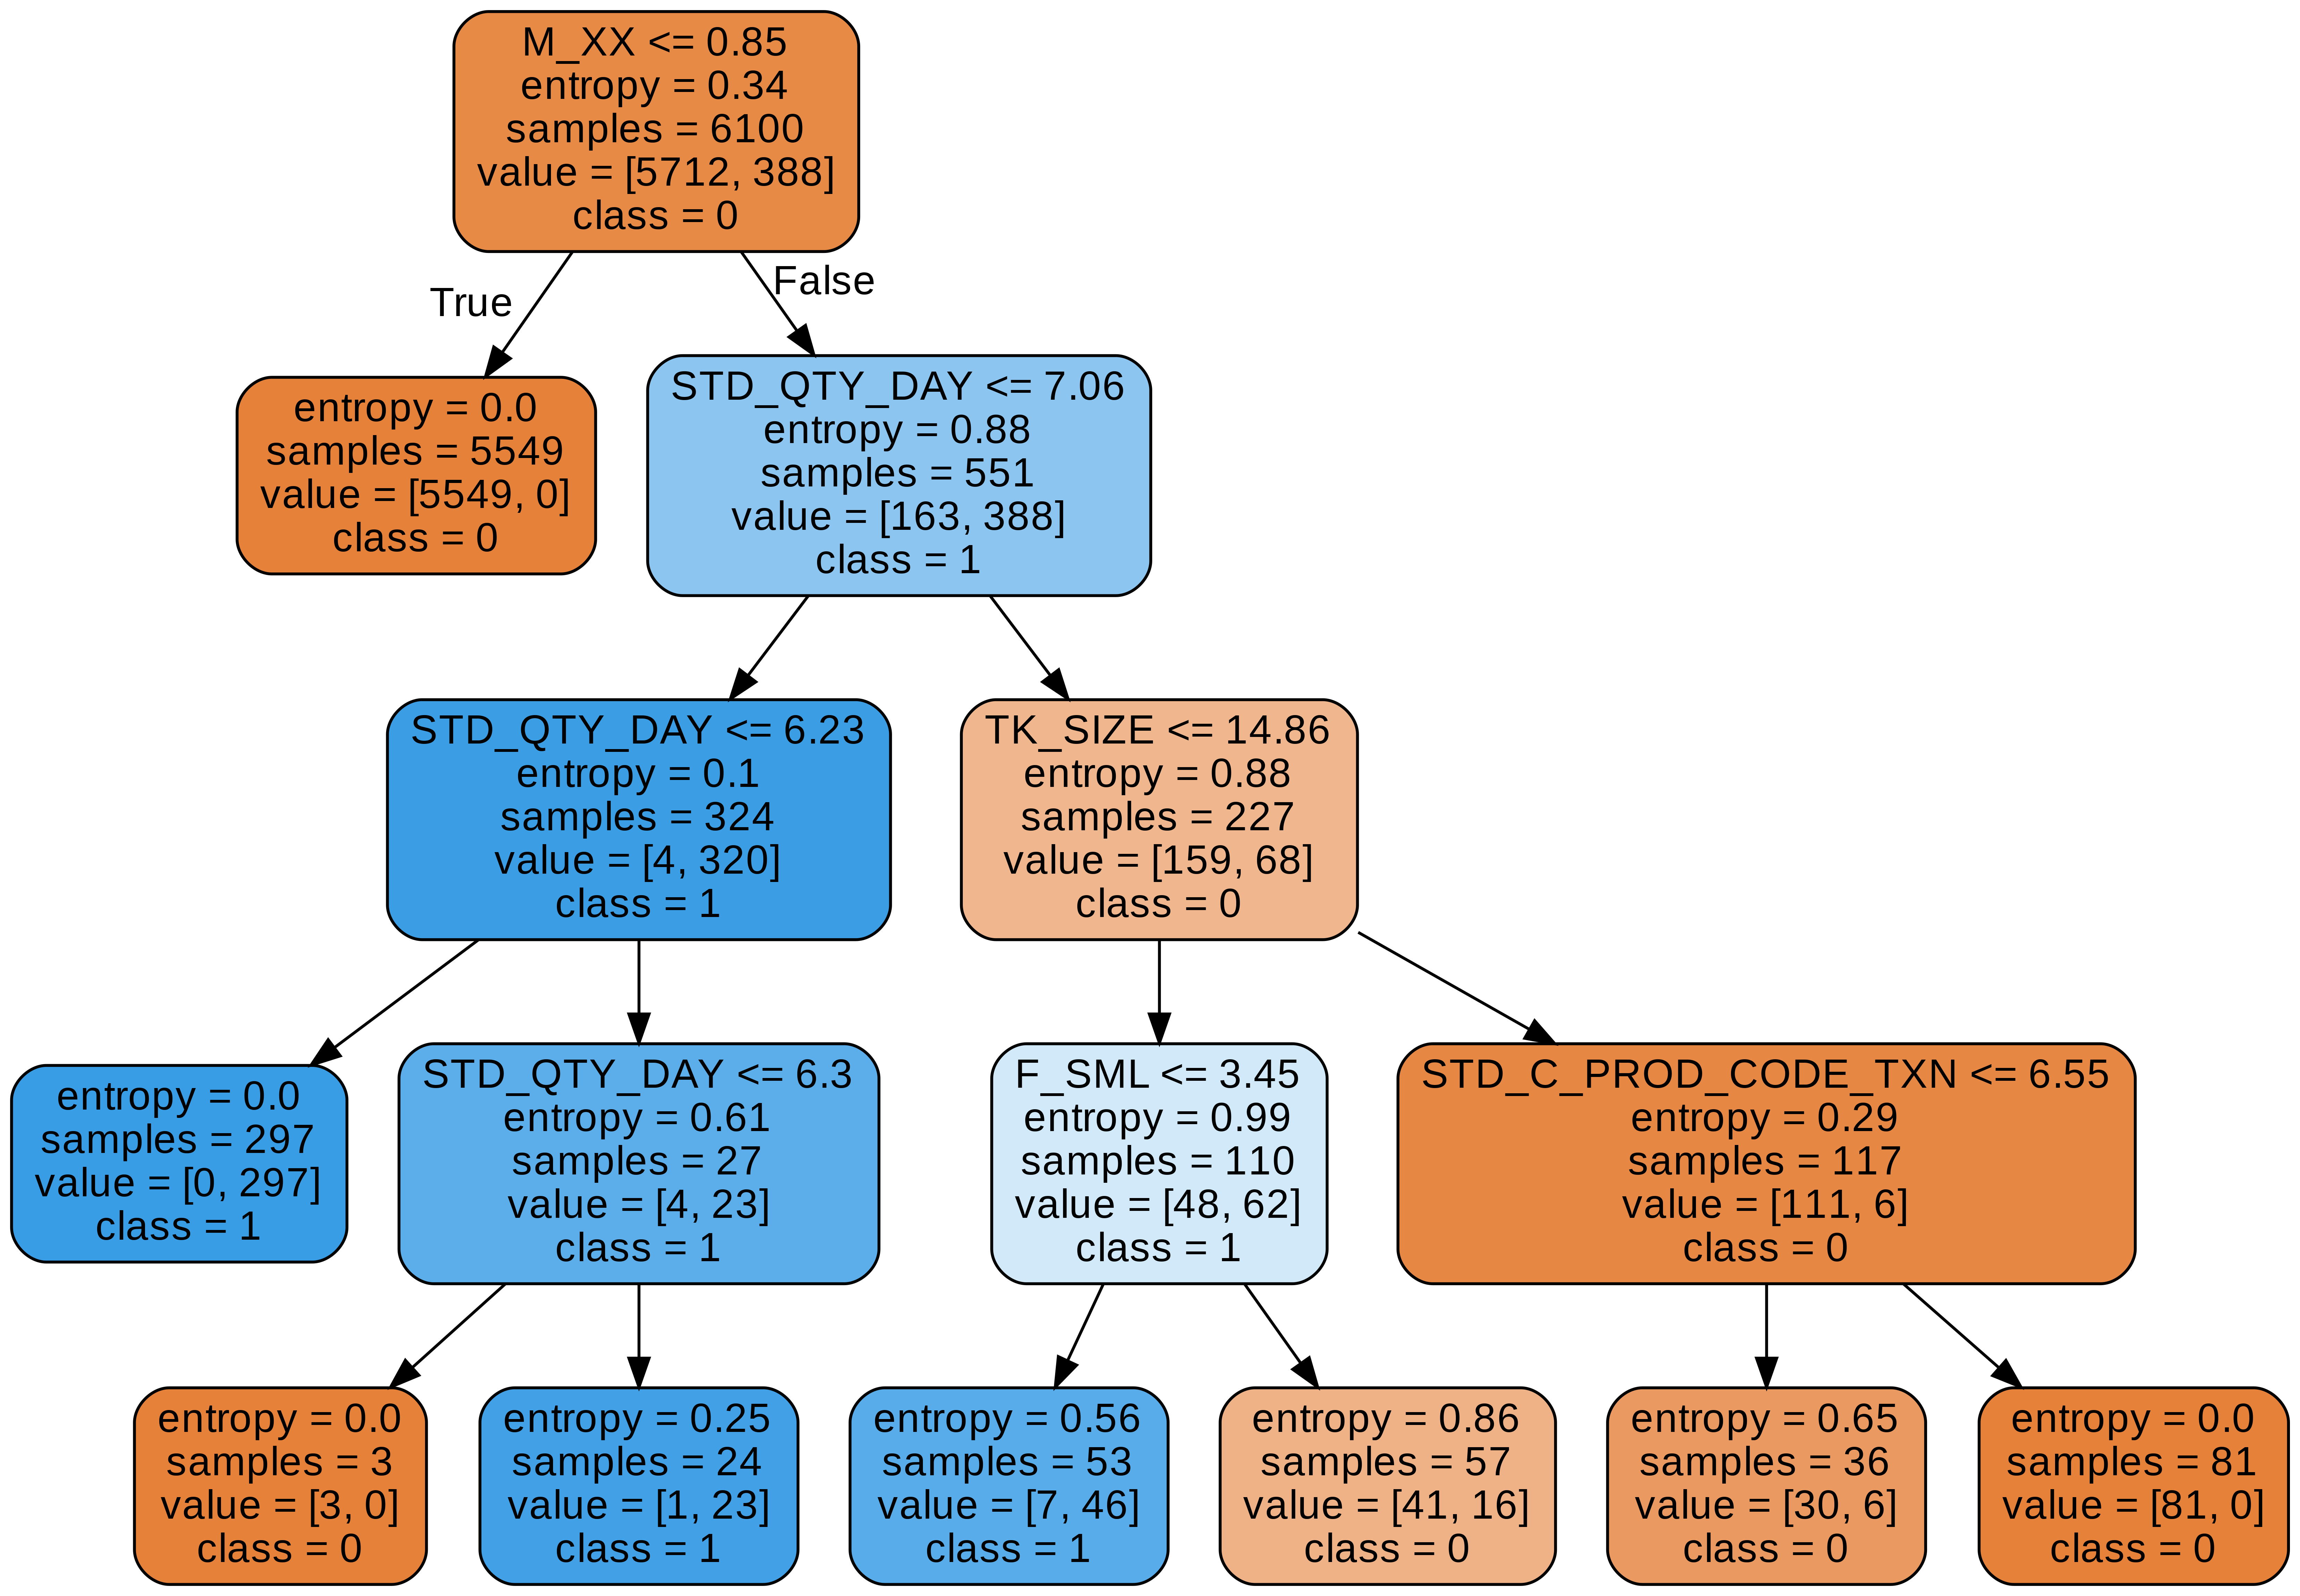

In [ ]:
Image(filename = 'DCS_TREE_CLS6.png')